In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#This way of calculating the relative deviation works because the the x-axis arrays are equal.
def reldev(y1, y2):
    return 100*(y2 - y1)/y1

In [3]:
# Load files:
lcdmCl = np.loadtxt('./lcdm_cl.dat', unpack=True)
lcdmPk = np.loadtxt('./lcdm_pk.dat', unpack=True)
cl = {}
pk = {}
for alpha_b in [0, 0.625, 1.25, 1.875, 2.5]:
    cl[alpha_b] = np.loadtxt('./b{}_cl.dat'.format(alpha_b), unpack=True)  # {alpha_b: [l, (l(l+1)/2pi)cl^TT, ...]}
    pk[alpha_b] = np.loadtxt('./b{}_pk.dat'.format(alpha_b), unpack=True)  # {alpha_b: [k, P(k)]}

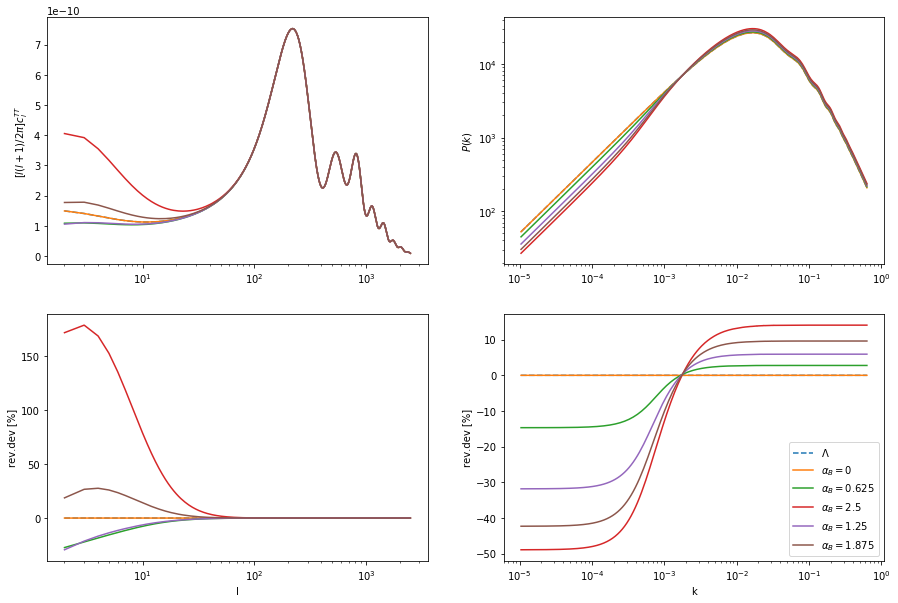

In [4]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))

# First plot LCDM results
clList = lcdmCl
pkList = lcdmPk
label = r'$\Lambda$'

ax[0, 0].semilogx(clList[0], clList[1], '--', label=label)
ax[0, 0].set_ylabel(r'$[l(l+1)/2\pi]c^{TT}_l$')

ax[0, 1].loglog(pkList[0], pkList[1], '--', label=label)
ax[0, 1].set_ylabel(r'$P(k)$')

ax[1, 0].semilogx(clList[0], reldev(clList[1], clList[1]), '--', label=label)
ax[1, 0].set_xlabel('l')
ax[1, 0].set_ylabel(r'rev.dev [%]')

ax[1, 1].semilogx(pkList[0], reldev(clList[1], pkList[1]), '--', label=label)
ax[1, 1].set_xlabel('k')
ax[1, 1].set_ylabel(r'rev.dev [%]')

# Then plot the modified gravity results
for alpha_b in cl:
    clList = cl[alpha_b]
    pkList = pk[alpha_b]
    label = r'$\alpha_B={}$'.format(alpha_b)
    
    ax[0, 0].semilogx(clList[0], clList[1], label=label)    
    ax[0, 1].loglog(pkList[0], pkList[1] , label=label)
    ax[1, 0].semilogx(clList[0], reldev(lcdmCl[1], clList[1]), label=label)
    ax[1, 1].semilogx(pkList[0], reldev(lcdmPk[1], pkList[1]), label=label)

plt.legend(loc=0)
plt.show()
plt.close()